# **혼자 공부하는 머신러닝 + 딥러닝 CH 3**

## **농어 무게 예측**

### **데이터 준비**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

In [ ]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state = 42)

In [ ]:
pl = PolynomialFeatures(include_bias=False)
pl.fit([[2, 3]])
pl.transform([[2,3]])


array([[2., 3., 4., 6., 9.]])

In [ ]:
pl = PolynomialFeatures(include_bias=False)
pl.fit(X_train)
X_train_poly = pl.transform(X_train)
print(X_train_poly.shape)

(42, 9)


In [ ]:
pl.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
X_test_poly = pl.transform(X_test)

In [ ]:
lrp = LinearRegression()
lrp.fit(X_train_poly, y_train)
print(lrp.score(X_train_poly, y_train))
lrp.score(X_test_poly, y_test)

0.9903183436982124


0.9714559911594132

In [ ]:
pl_5 = PolynomialFeatures(degree=5, include_bias=False)
pl_5.fit(X_train)
X_train_poly5 = pl_5.transform(X_train)
X_test_poly5 = pl_5.transform(X_test)
lrp_5 = LinearRegression()
lrp_5.fit(X_train_poly5, y_train)
print(lrp_5.score(X_train_poly5, y_train))
print(lrp_5.score(X_test_poly5, y_test))

0.9999999999991096
-144.40579242335605


In [ ]:
ss = StandardScaler()
ss.fit(X_train_poly)
X_train_scaled = ss.transform(X_train_poly)
X_test_scaled = ss.transform(X_test_poly)


In [ ]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
print(ridge.score(X_train_scaled, y_train))
print(ridge.score(X_test_scaled, y_test))

0.9857915060511934
0.9835057194929057


In [ ]:
train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train_scaled, y_train)
  train_score.append(ridge.score(X_train_scaled, y_train))
  test_score.append(ridge.score(X_test_scaled, y_test))
  

In [ ]:
np_train = np.array(train_score)
np_test = np.array(test_score)

r_square_list = abs(np_train - np_test)
plt.plot(np.log10(alpha_list), r_square_list)
plt.show()


In [ ]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_scaled, y_train)
print(ridge.score(X_train_scaled, y_train))
print(ridge.score(X_test_scaled, y_test))

0.9857915060511934
0.9835057194929057


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29028.19690351323, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26856.897649325634, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2545.601053389939, tolerance: 518.2793833333334
  positive)


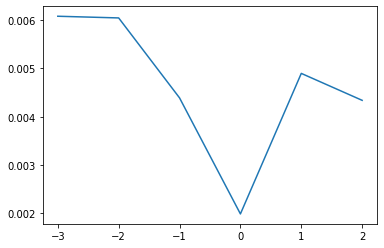

In [ ]:
lasso_train = []
lasso_test = []
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train_scaled, y_train)
  lasso_train.append(lasso.score(X_train_scaled, y_train))
  lasso_test.append(lasso.score(X_test_scaled, y_test)) 

np_tr = np.array(lasso_train)
np_te = np.array(lasso_test)

plt.plot(np.log10(alpha_list), abs(np_tr - np_te))
plt.show()

In [ ]:
lasso = Lasso(alpha = 1)
lasso.fit(X_train_scaled, y_train)
print(lasso.score(X_train_scaled, y_train))
print(lasso.score(X_test_scaled, y_test))

0.9865912554645588
0.9846056618190413
